## NLP PROJECT ON SENTIMENTAL ANALYSIS OF AMAZON PRODUCT REVIEWS 

- first we will scrape tweets with the word 'crypto' because it's been down(according to the stock market) for quite a few months.
- you can take any keyword that is trending so you can pick up the tweets about them, like cricket, football, BMX, any game, any topic on which you want to do the sentimental analysis upon.

what is sentimental analysis?
-----
in layman terms, it gives us the analysis of the sentiments of the general public, as in case of tweets on twitter on any particular topic, or people posting reviews on something or updating their blogs on some topic. The analysis of this data of opinions/sentiments of people on a particular topic using NLP is called **sentimental analysis or opinion mining**
- **what we will do here** is take about a 1000 tweets with the word 'crypto', analyse them by making a deep dive sentimental analysis on those tweets one by one, see the positive/negative/neutral emotions behind them using the **two concepts SUBJECTIVITY and POLARITY.**
- we will use **polarity** to tell us whether the statement/tweet/opinion is positive/negative/neutral and then we will use the frequency distribution module and stemmers to find the **top 20-50 most common words** in these 1000 tweets.
- **what is the point/use of sentimental analysis?** for eg: a company like Amazon can do a sentimental analysis on the reviews/complaints made by the customers to get information on the sales of different products, customer satisfaction, most bought or sought out product, difficulties faced by clients, etc.

In [1]:
#pip install snscrape in Anaconda powershell prompt
from datetime import date   #y
import snscrape.modules.twitter as sntwitter   #n
import pandas as pd   #y
import numpy as np    #y
#pip install for textblob and wordcloud as well
from textblob import TextBlob      #n
from wordcloud import WordCloud    #n
import re    #y
import matplotlib.pyplot as plt   #y
import seaborn as sns    #y
plt.style.use('fivethirtyeight')   #dk what it is
import nltk    #y
from nltk.stem.snowball import SnowballStemmer    #y
from nltk.corpus import stopwords    #y
#pip install spacy
import spacy    #n
#spacy download en in anaconda as well
nlp = spacy.load("en_core_web_sm")   #n

## none of what i'm doing above worked. unable to scrape tweets!!
## I will therefore be using these amazon reviews to perform sentimental analysis.

In [2]:
amazondf = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
amazondf

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [3]:
amazondf['reviewText'].iloc[198]

"Who doesn't likel the birds!  These guys are fun to watch and play. I love the various levels and designs created for the characters. Can't wait to see/play future games."

In [4]:
def clean_reviews(text):  #was meant for cleaning tweets originally
    #i'll still use the code on my reviews 
    text = re.sub("@[A-Za-z0-9_]+", "", text)  #removes @mentions
    text = re.sub("#", "", text) #removes # smbols
    text = re.sub('RT[\s]+', '', text)  #might be something to do with retweets
    text = re.sub('https?:\/\/\S+', '', text)  #links
    text = re.sub('\n', ' ', text)
    return text

In [5]:
amazondf['cleanReviews'] = amazondf['reviewText'].apply(clean_reviews)
amazondf.head(10)

,reviewText,Positive,cleanReviews
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...
2,this is a really cool game. there are a bunch ...,1,this is a really cool game. there are a bunch ...
3,"This is a silly game and can be frustrating, b...",1,"This is a silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad. Hrs of fun...
5,This is a very entertaining game! You don't h...,1,This is a very entertaining game! You don't h...
6,this is awesome and you don't need wi ti to pl...,1,this is awesome and you don't need wi ti to pl...
7,this is awesome I bet no one even reads the re...,1,this is awesome I bet no one even reads the re...
8,This is basicly the free version but with ads....,1,This is basicly the free version but with ads....
9,this is by far the best free app that is avail...,1,this is by far the best free app that is avail...


In [6]:
amazondf.to_csv('Reviews_Amazon.csv')

In [7]:
savedReviews = pd.read_csv('Reviews_Amazon.csv', index_col = 0)
savedReviews.head()

,reviewText,Positive,cleanReviews
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...
2,this is a really cool game. there are a bunch ...,1,this is a really cool game. there are a bunch ...
3,"This is a silly game and can be frustrating, b...",1,"This is a silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad. Hrs of fun...


In [8]:
#subjectivity: depends on human's behaviour, sentiments etc. It is a subjective
#term. It's value ranges from 0 to 1. We will not use or evaluate that; it's
#just for understanding.

#polarity : a floating number between -1 to +1, with -1 being a negative 
#statement and +1 being a positive statement

In [9]:
#Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
savedReviews['Subjectivity'] = savedReviews['cleanReviews'].apply(getSubjectivity)
savedReviews['Polarity'] = savedReviews['cleanReviews'].apply(getPolarity)
savedReviews.head(15)

,reviewText,Positive,cleanReviews,Subjectivity,Polarity
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,0.300000,1.000000
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,0.650000,0.225000
2,this is a really cool game. there are a bunch ...,1,this is a really cool game. there are a bunch ...,0.483333,0.176667
3,"This is a silly game and can be frustrating, b...",1,"This is a silly game and can be frustrating, b...",0.512500,-0.116667
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad. Hrs of fun...,0.558333,0.191667
5,This is a very entertaining game! You don't h...,1,This is a very entertaining game! You don't h...,0.612313,0.099660
6,this is awesome and you don't need wi ti to pl...,1,this is awesome and you don't need wi ti to pl...,0.579167,0.050595
7,this is awesome I bet no one even reads the re...,1,this is awesome I bet no one even reads the re...,0.666667,0.433333
8,This is basicly the free version but with ads....,1,This is basicly the free version but with ads....,0.508333,0.333333
9,this is by far the best free app that is avail...,1,this is by far the best free app that is avail...,0.680000,0.180000


In [11]:
#Creating a function which assigns the conclusion as 'Positive', 'Negative' or
#'Neutral' to the review/tweet using the polarity score.

def get_analysis(pscore):
    #pscore < 0 --> negative
    if pscore < 0:
        return 'Negative'
    #pscore > 0 --> positive
    if pscore > 0: 
        return 'Positive'
    #pscore == 0 --> neutral
    if pscore == 0:
        return 'Neutral'

In [12]:
get_analysis(0.333333)

'Positive'

In [13]:
savedReviews['Polarity_Conclusion'] = savedReviews['Polarity'].apply(get_analysis)

In [14]:
savedReviews.head()

,reviewText,Positive,cleanReviews,Subjectivity,Polarity,Polarity_Conclusion
0,This is a one of the best apps acording to a b...,1,This is a one of the best apps acording to a b...,0.300000,1.000000,Positive
1,This is a pretty good version of the game for ...,1,This is a pretty good version of the game for ...,0.650000,0.225000,Positive
2,this is a really cool game. there are a bunch ...,1,this is a really cool game. there are a bunch ...,0.483333,0.176667,Positive
3,"This is a silly game and can be frustrating, b...",1,"This is a silly game and can be frustrating, b...",0.512500,-0.116667,Negative
4,This is a terrific game on any pad. Hrs of fun...,1,This is a terrific game on any pad. Hrs of fun...,0.558333,0.191667,Positive


In [15]:
savedReviews['Polarity_Conclusion'].value_counts()

Polarity_Conclusion
Positive    15194
Negative     3902
Neutral       904
Name: count, dtype: int64

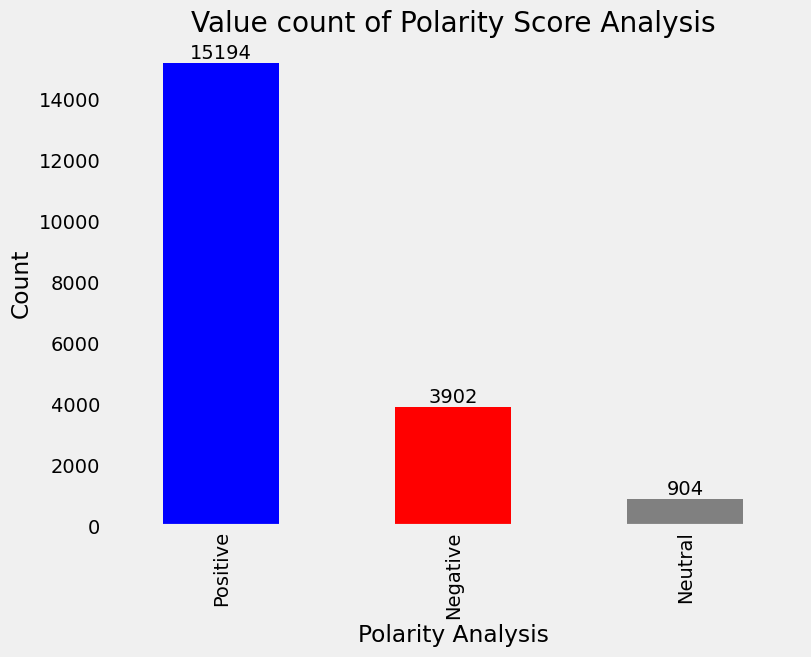

In [16]:
fig = plt.figure(figsize = (8,6))
colors = ['blue', 'red', 'grey']
ax = savedReviews['Polarity_Conclusion'].value_counts().plot(kind = 'bar', color = colors)
plt.title('Value count of Polarity Score Analysis')
plt.xlabel('Polarity Analysis')
plt.ylabel('Count')
plt.grid(False)
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
sentences = []
for revs in savedReviews['cleanReviews']:
    sentences.append(revs)
sentences

['This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff',
 'This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.',
 'this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.',
 'This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.',
 'This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines',
 "This is a very entertaining game!  You don't have to be smart to play it.  I guess that's why I like it...it's easy and fun and that's what games are suppose to be.  Be warned: this game is highly addictive.",
 "this is awesome and you don't need wi ti to play trust me. it is really fun and addicting. there are like 100 levels it is even free don't waste your money on the expensive one I mean s

In [18]:
lines =[]
for review in sentences:
    words = review.split()
    for word in words:
        lines.append(word)
lines

['This',
 'is',
 'a',
 'one',
 'of',
 'the',
 'best',
 'apps',
 'acording',
 'to',
 'a',
 'bunch',
 'of',
 'people',
 'and',
 'I',
 'agree',
 'it',
 'has',
 'bombs',
 'eggs',
 'pigs',
 'TNT',
 'king',
 'pigs',
 'and',
 'realustic',
 'stuff',
 'This',
 'is',
 'a',
 'pretty',
 'good',
 'version',
 'of',
 'the',
 'game',
 'for',
 'being',
 'free.',
 'There',
 'are',
 'LOTS',
 'of',
 'different',
 'levels',
 'to',
 'play.',
 'My',
 'kids',
 'enjoy',
 'it',
 'a',
 'lot',
 'too.',
 'this',
 'is',
 'a',
 'really',
 'cool',
 'game.',
 'there',
 'are',
 'a',
 'bunch',
 'of',
 'levels',
 'and',
 'you',
 'can',
 'find',
 'golden',
 'eggs.',
 'super',
 'fun.',
 'This',
 'is',
 'a',
 'silly',
 'game',
 'and',
 'can',
 'be',
 'frustrating,',
 'but',
 'lots',
 'of',
 'fun',
 'and',
 'definitely',
 'recommend',
 'just',
 'as',
 'a',
 'fun',
 'time.',
 'This',
 'is',
 'a',
 'terrific',
 'game',
 'on',
 'any',
 'pad.',
 'Hrs',
 'of',
 'fun.',
 'My',
 'grandkids',
 'love',
 'it.',
 'Great',
 'entertainme

In [22]:
len(lines)

678808

In [19]:
stemmer = SnowballStemmer(language = 'english')
stem1 = []
for word in lines:
    stem1.append(stemmer.stem(word))
stem1[:20]

['this',
 'is',
 'a',
 'one',
 'of',
 'the',
 'best',
 'app',
 'acord',
 'to',
 'a',
 'bunch',
 'of',
 'peopl',
 'and',
 'i',
 'agre',
 'it',
 'has',
 'bomb']

In [20]:
#removing stop words 
post_stem = []
for word in stem1:
    if word not in nlp.Defaults.stop_words:
        post_stem.append(word)
post_stem[:100]

['best',
 'app',
 'acord',
 'bunch',
 'peopl',
 'agre',
 'bomb',
 'egg',
 'pig',
 'tnt',
 'king',
 'pig',
 'realust',
 'stuff',
 'pretti',
 'good',
 'version',
 'game',
 'free.',
 'lot',
 'differ',
 'level',
 'play.',
 'kid',
 'enjoy',
 'lot',
 'too.',
 'realli',
 'cool',
 'game.',
 'bunch',
 'level',
 'find',
 'golden',
 'eggs.',
 'super',
 'fun.',
 'silli',
 'game',
 'frustrating,',
 'lot',
 'fun',
 'definit',
 'recommend',
 'fun',
 'time.',
 'terrif',
 'game',
 'ani',
 'pad.',
 'hrs',
 'fun.',
 'grandkid',
 'love',
 'it.',
 'great',
 'entertain',
 'wait',
 'long',
 'line',
 'veri',
 'entertain',
 'game!',
 "don't",
 'smart',
 'play',
 'it.',
 'guess',
 'whi',
 'like',
 'it...it',
 'easi',
 'fun',
 'game',
 'suppos',
 'be.',
 'warned:',
 'game',
 'high',
 'addictive.',
 'awesom',
 "don't",
 'need',
 'wi',
 'ti',
 'play',
 'trust',
 'me.',
 'realli',
 'fun',
 'addicting.',
 'like',
 '100',
 'level',
 'free',
 "don't",
 'wast',
 'money',
 'expens',
 'mean']

In [25]:
len(post_stem)

329801

In [21]:
#to remove emojis from text
post_stem2 = []
from cleantext import clean
for word in post_stem:
    x = clean(word, no_emoji = True)
    if len(x) > 0:
        post_stem2.append(x)
        
post_stem2[:50]
#this is not working so....

TypeError: clean() got an unexpected keyword argument 'no_emoji'

In [23]:
import emoji
post_stem2 = []
for word in post_stem:
    x = emoji.replace_emoji(word, replace ="")
    if len(x) > 0:
        post_stem2.append(x)
post_stem2[:50]

['best',
 'app',
 'acord',
 'bunch',
 'peopl',
 'agre',
 'bomb',
 'egg',
 'pig',
 'tnt',
 'king',
 'pig',
 'realust',
 'stuff',
 'pretti',
 'good',
 'version',
 'game',
 'free.',
 'lot',
 'differ',
 'level',
 'play.',
 'kid',
 'enjoy',
 'lot',
 'too.',
 'realli',
 'cool',
 'game.',
 'bunch',
 'level',
 'find',
 'golden',
 'eggs.',
 'super',
 'fun.',
 'silli',
 'game',
 'frustrating,',
 'lot',
 'fun',
 'definit',
 'recommend',
 'fun',
 'time.',
 'terrif',
 'game',
 'ani',
 'pad.']

In [24]:
len(post_stem2)

329801

In [26]:
# creating new df 
df = pd.DataFrame(post_stem2)
top_counts = df[0].value_counts()
top_counts

0
app               8600
game              4727
love              4507
use               4418
like              4057
                  ... 
complicated!!!       1
confused!            1
guts.                1
it.great             1
stormid              1
Name: count, Length: 33219, dtype: int64

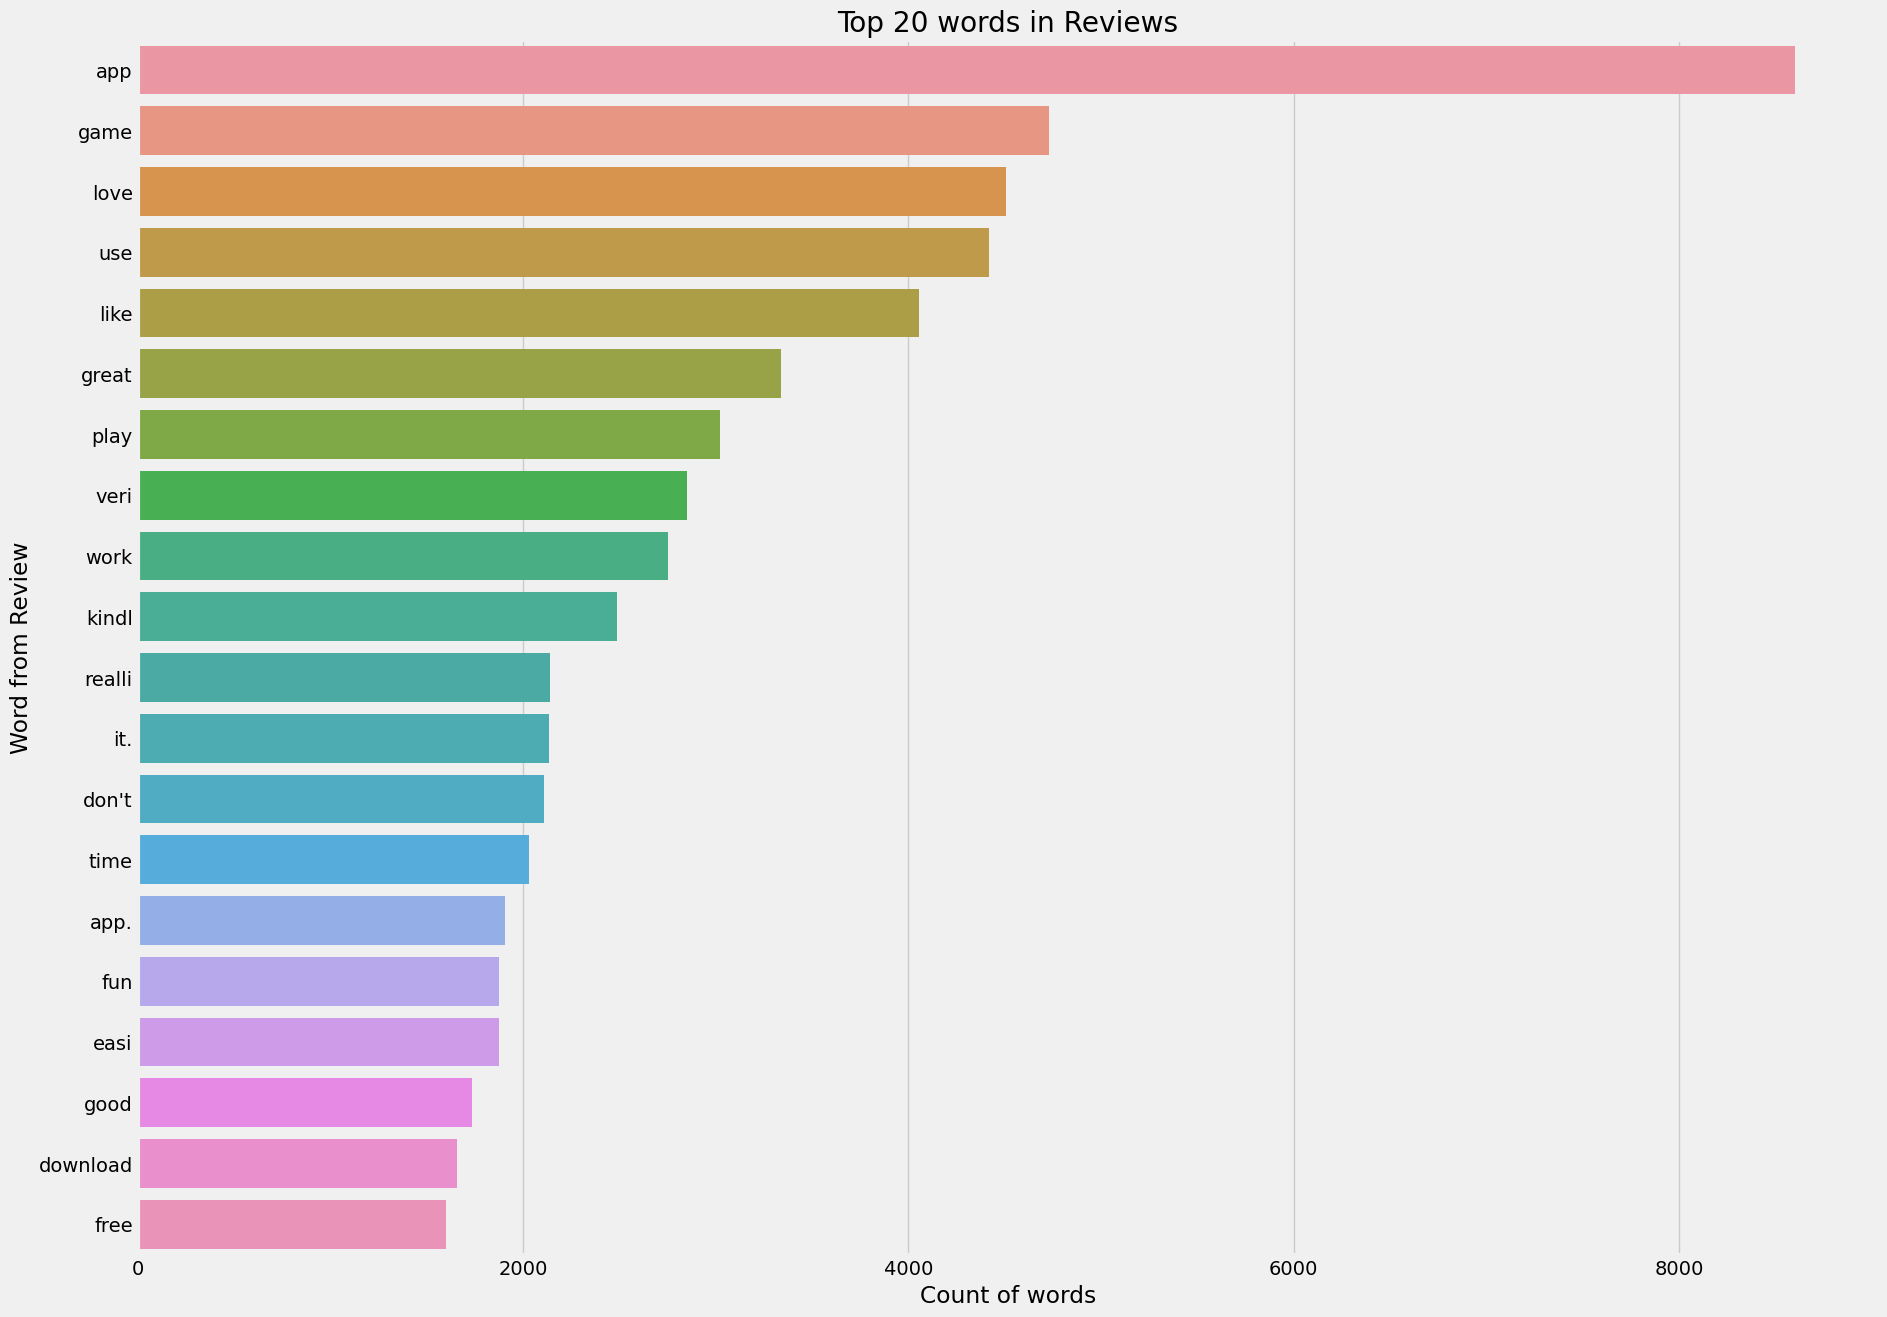

In [27]:
#plot top 20 used words
top20_counts = top_counts[:20]
dfcount = pd.DataFrame(top20_counts).T
plt.figure(figsize = (20, 15))
sns.barplot(dfcount, alpha = 1.0, orient = 'h')
plt.title('Top 20 words in Reviews')
plt.xlabel('Count of words')
plt.ylabel('Word from Review')
plt.show()

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [37]:
top_words = nltk.FreqDist(post_stem2)
wordcloud_top_words = WordCloud(width = 800, height = 400, background_color =
                        'white').generate_from_frequencies(top_words)

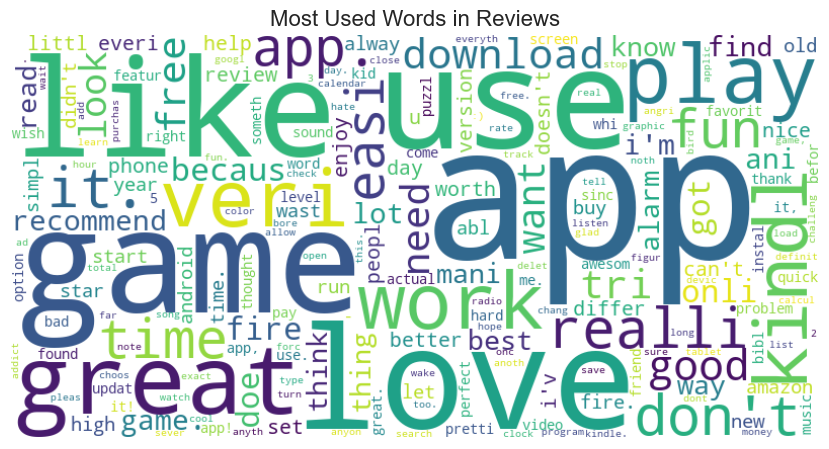

In [43]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud_top_words, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Used Words in Reviews', fontsize = 16)
plt.show;

In [29]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in post_stem2]

positive_words = [word for i, word in enumerate(post_stem2) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(post_stem2) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(post_stem2) if sentiment_scores[i] >= -0.1 and
                sentiment_scores[i] <= 0.1]

In [32]:
print('Some of the positive words are: \n', positive_words[:25])
print()
print('No. of positive words: ',len(positive_words))

Some of the positive words are: 
 ['best', 'good', 'free.', 'play.', 'enjoy', 'cool', 'super', 'fun.', 'fun', 'recommend', 'fun', 'fun.', 'love', 'great', 'entertain', 'entertain', 'smart', 'play', 'like', 'fun', 'play', 'trust', 'fun', 'like', 'free']

No. of positive words:  44576


In [33]:
print('Some of the negative words are: \n', negative_words[:25])
print()
print('No. of negative words: ',len(negative_words))

Some of the negative words are: 
 ['bomb', 'frustrating,', 'warned:', 'seriously.', 'hate', 'tricks.', 'tough', 'fire', 'boredom!', 'difficult', 'bomb', 'fire,', 'bad', 'stupid.', 'fire', 'fire', 'damn', 'fire.', 'fire', 'fire.', 'fire!', 'fire', 'bother', 'hard', 'pay']

No. of negative words:  13294


In [34]:
print('Some of the neutral words are: \n', neutral_words[:25])
print()
print('No. of neutral words: ',len(neutral_words))

Some of the neutral words are: 
 ['app', 'acord', 'bunch', 'peopl', 'agre', 'egg', 'pig', 'tnt', 'king', 'pig', 'realust', 'stuff', 'pretti', 'version', 'game', 'lot', 'differ', 'level', 'kid', 'lot', 'too.', 'realli', 'game.', 'bunch', 'level']

No. of neutral words:  271931


In [35]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 1334 samples and 44576 outcomes>
<FreqDist with 1075 samples and 13294 outcomes>
<FreqDist with 30810 samples and 271931 outcomes>


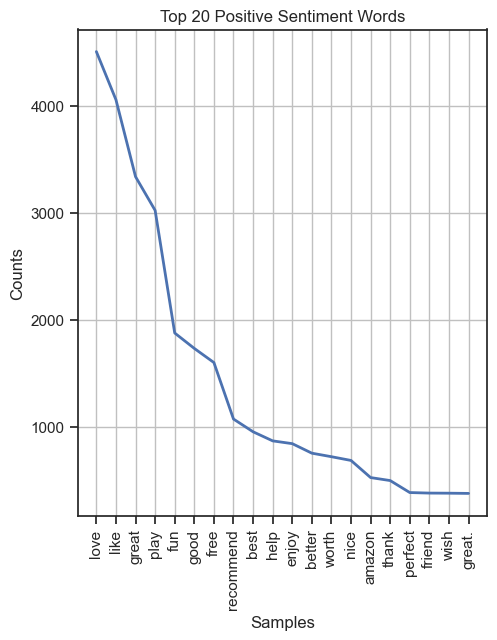

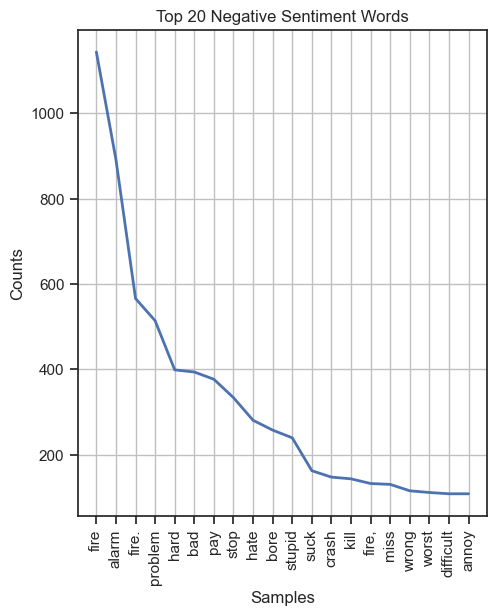

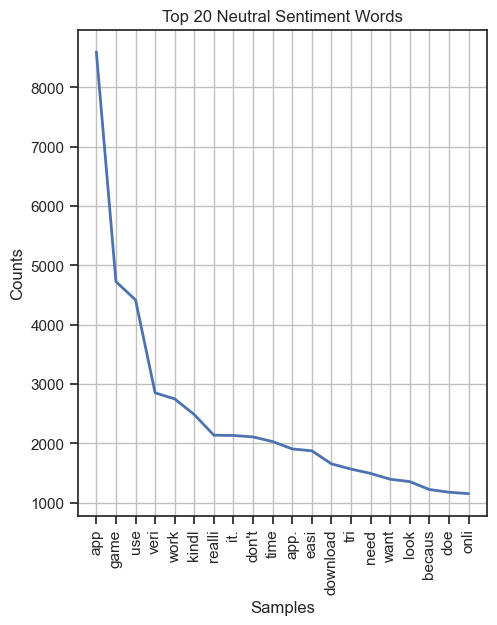

<Figure size 640x480 with 0 Axes>

In [36]:
sns.set_theme(style = 'ticks')

plt.figure(figsize = (16,6))
plt.subplot(131)
word_freq_positive.plot(20, title = 'Top 20 Positive Sentiment Words')

plt.figure(figsize = (16,6))
plt.subplot(132)
word_freq_negative.plot(20, title = 'Top 20 Negative Sentiment Words')

plt.figure(figsize = (16,6))
plt.subplot(133)
word_freq_neutral.plot(20, title = 'Top 20 Neutral Sentiment Words')

plt.tight_layout()
plt.show()